## Observations and Insights            
### Jake Burns

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts
import random
from scipy.stats import sem

In [2]:
# Set the seed so our data is reproducible
random.seed(7)

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
#mouse_metadata preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
#study results preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
# Combine the data into a single dataset
complete_mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

In [8]:
#Preview comnined dataframe
complete_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# #testing

# complete_mouse_study_df.groupby(["Mouse ID"]).agg({
    
# })


In [10]:
#check number of mice is starting at 249
complete_mouse_study_df.groupby(["Mouse ID"]).count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [11]:
#groupby MouseID and Timepoint to capture duplicate data points to eliminate duplicate values

# dups= complete_mouse_study_df.groupby(["Mouse ID", "Timepoint"]).count()

# # #testing .agg

# # complete_mouse_study_df.groupby(["Mouse ID", "Timepoint"]).agg({
    
# # })
# dups


In [12]:
# find number of duplicate Mice data using .duplicated

# print(complete_mouse_study_df.duplicated(subset= ["Mouse ID"]))
#comment out after viewing list

#include .sum into coding to determine number of duplicate IDs

print(complete_mouse_study_df.duplicated(subset= ["Mouse ID", "Timepoint"], keep= False).sum())

10


In [13]:
#Remove duplicate rows and create clean dataframe with only unique values
#drop_duplicates drops duplicate rows

#keep = false ensures that we drop all duplicate rows, even the "first/original" duplicate row read



Dup_mouse_ID_list= complete_mouse_study_df[complete_mouse_study_df.duplicated(subset= ["Mouse ID", "Timepoint"], keep= False)]

Dup_mouse_ID_list
#up_mouse_ID_list= test1["Mouse ID"]
#Dup_mouse_ID_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
#groupby mouseid to find diff dup ids  (even though it's only one in this case)
Dup_mouse_ID= Dup_mouse_ID_list.groupby(["Mouse ID"]).count()
Dup_mouse_ID

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,10,10,10,10,10,10,10


In [15]:
#Now call full df where Mouse ID does not equal ID from Duplicate findings

clean_complete_df = complete_mouse_study_df[
    (complete_mouse_study_df["Mouse ID"] != 'g989')]



clean_complete_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
#checking to see number of mice after cleaning
clean_complete_df.groupby(["Mouse ID"]).count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [18]:
# Optional: Get all the data for the duplicate mouse ID. 



In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [20]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean_numpy = np.mean(clean_complete_df["Tumor Volume (mm3)"])
print(f"The mean tumor volume is {tumor_mean_numpy}")


tumor_median_numpy = np.median(clean_complete_df["Tumor Volume (mm3)"])
print(f"The median tumor volume is {tumor_median_numpy}")


tumor_variance_numpy = np.var(clean_complete_df["Tumor Volume (mm3)"])
print(f"The variance of the tumor volume data is {tumor_variance_numpy}")

tumor_std_scipy = sts.tstd(clean_complete_df["Tumor Volume (mm3)"])
print(f"The std for the tumor volume data is {tumor_std_scipy}")

#SEM (Standard Error of the Mean)       sample size of 50
sample= clean_complete_df.sample(50)
# tumor_sem = sts.tstd(clean_complete_df["Tumor Volume (mm3)"])

samp_variable= sample["Tumor Volume (mm3)"]

print(f"The SEM value for the tumor volume data is {sem(samp_variable)}")

The mean tumor volume is 50.43529323225532
The median tumor volume is 48.933453655
The variance of the tumor volume data is 79.42063964177238
The std for the tumor volume data is 8.91419694339166
The SEM value for the tumor volume data is 1.4776861872119533


In [22]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


drug_regimen_df = clean_complete_df.groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

drug_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#create groupby counting timepints (measurements taken) for each drug regimen
tot_measurements_df = clean_complete_df.groupby(['Drug Regimen']).count()['Timepoint']
tot_measurements_df

#tot_measure_2 = tot_measurements.groupby()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

##### ^ Above list created for y values ^

##### Below list created for x values

In [25]:
#create x axis list for different Drug Regimens

x_drug_regimen= clean_complete_df['Drug Regimen'].unique()

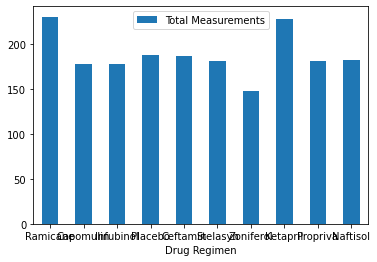

In [26]:
#Create bar graph

df = pd.DataFrame({'Drug Regimen':x_drug_regimen, 'Total Measurements':tot_measurements_df})
ax = df.plot.bar(x='Drug Regimen', y='Total Measurements', rot=0)

<BarContainer object of 10 artists>

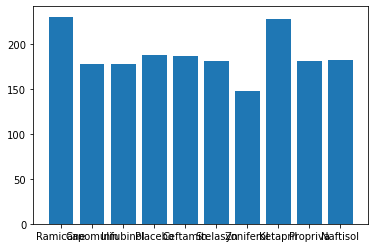

In [27]:
plt.bar(x_drug_regimen, tot_measurements_df)

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



# clean graphs and make identical

In [29]:
sex_count_df= clean_complete_df['Sex'].value_counts()
sex_count_df

Male      958
Female    922
Name: Sex, dtype: int64

In [30]:
male_mice_count= sex_count_df[0]
#male_mice_count

In [31]:
female_mice_count= sex_count_df[1]
#female_mice_count

## edit graph to look good and add details

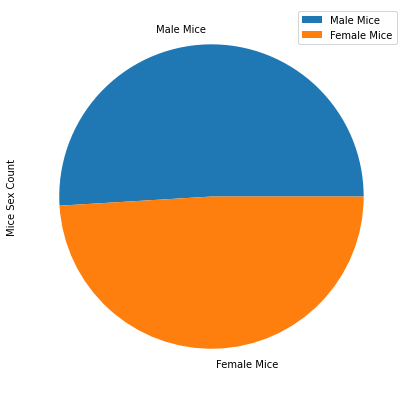

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df = pd.DataFrame({"Mice Sex Count": [male_mice_count, female_mice_count],
                   'radius': [2439.7, 6051.8]},
                  index=['Male Mice', 'Female Mice'])
pie_plot = pie_df.plot.pie(y='Mice Sex Count', figsize=(7, 7))

(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

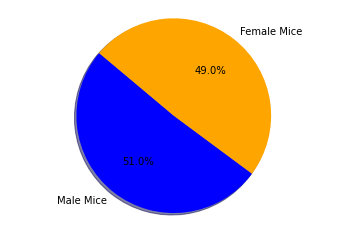

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male Mice", "Female Mice"]

# The values of each section of the pie chart
sizes = [male_mice_count, female_mice_count]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## edit graph to look good and add details

## Quartiles, Outliers and Boxplots

In [34]:
#reference
clean_complete_df.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1873,z795,Naftisol,Female,13,29,0,45.000000,0
1874,z795,Naftisol,Female,13,29,5,46.833475,0
1875,z795,Naftisol,Female,13,29,10,48.030804,0
1876,z795,Naftisol,Female,13,29,15,49.368132,1
1877,z795,Naftisol,Female,13,29,20,53.280657,1
1878,z795,Naftisol,Female,13,29,25,57.947100,2
1879,z795,Naftisol,Female,13,29,30,59.789636,2
1880,z795,Naftisol,Female,13,29,35,60.435654,2
1881,z795,Naftisol,Female,13,29,40,62.376639,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [36]:
# Start by getting the last (greatest) timepoint for each mouse

# final_tumor_timepoint = clean_complete_df.groupby(['Mouse ID']).agg({
#     'Timepoint': ['max'],
# })


# # final_tumor_timepoint = clean_complete_df.groupby(['Mouse ID', 'Timepoint']).max()


# final_tumor_timepoint

In [37]:
# #drop all rows that aren't the four drugs we want to observe

# mouse_last_timepoint= final_tumor_volume.drop([3, 4, 5, 6, 8, 9])
# mouse_last_timepoint

In [38]:
# Capomulin_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Capomulin')]
# Ramicane_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Ramicane')]
# Infubinol_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Infubinol')]
# Ceftamin_lis= final_tumor_volume[final_tumor_volume['Drug Regimen'].str.match('Ceftamin')]

# Capomulin_lis
# # print(Ramicane_lis)
# # print(Infubinol_lis)
# # print(Ceftamin_lis)

In [39]:
# four_treatments1= Capomulin_lis.add(Ramicane_lis, fill_value= 0) 
# four_treatments2= Infubinol_lis.add(Ceftamin_lis, fill_value= 0)

In [40]:
clean_complete_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [41]:
# xy= clean_complete_df.groupby('Mouse ID').max()

# xy= clean_complete_df.groupby(['Mouse ID']).agg({
#     'Timepoint': ['max']
# })


#include as_index= false so the output is a df with iteratable columns
xy= clean_complete_df.groupby(['Drug Regimen','Mouse ID'], as_index=False).agg({
    'Timepoint': ['max'],
    'Tumor Volume (mm3)': ['last']
})


# xy= clean_complete_df.groupby(['Drug Regimen','Mouse ID']).agg({
#     'Timepoint': ['max'],
#     'Tumor Volume (mm3)': ['last']
# })





xy

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
,,,max,last
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952


In [42]:
#fix column indexing

#rename columns
xy.columns=xy.columns.map('_'.join)
xy.head()

,Drug Regimen_,Mouse ID_,Timepoint_max,Tumor Volume (mm3)_last
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [43]:
# trying to only return the 4 drug regimens we want:
#create empty list to be filled later

Capomulin_list= []
Ramicane_list= []
Infubinol_list= []
Ceftamin_list= []

In [44]:
# use a for loop with the .append command to add to lists when appropriate

for drug in range(len(xy)):
    if (xy.loc[drug, 'Drug Regimen_'] == 'Capomulin'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Capomulin_list.append(Addition)
        
    elif (xy.loc[drug, 'Drug Regimen_'] == 'Ramicane'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Ramicane_list.append(Addition)
        
    elif (xy.loc[drug, 'Drug Regimen_'] == 'Infubinol'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Infubinol_list.append(Addition)
        
    elif (xy.loc[drug, 'Drug Regimen_'] == 'Ceftamin'):
        Addition = xy.loc[drug, 'Tumor Volume (mm3)_last']
        Ceftamin_list.append(Addition)
        
    else:
        pass


#Tumor Volume (mm3)
    
# for drug in range(len(xy):
#                   if (xy.loc[drug, 'Drug Regimen'] == 'Capomulin'):
#                       Addition= xy.loc[drug, 'Tumor Volume (mm3)'])
#                       Capomulin_list.append(Addition)
#                   else:
#             pass
    

#for i in range(len(df)) :
#  print(df.loc[i, "Name"], df.loc[i, "Age"])


In [45]:
Capomulin_list

[38.98287774,
 38.93963263,
 30.48598484,
 37.07402422,
 40.1592203,
 47.68596303,
 37.31184577,
 38.125164399999996,
 38.75326548,
 41.48300765,
 38.84687569,
 28.43096411,
 33.32909778,
 46.53920617,
 32.37735684,
 41.58152074,
 23.34359787,
 40.72857787,
 34.45529799,
 31.02392294,
 40.65812366,
 39.95234669,
 36.04104736,
 28.48403281,
 31.896238399999998]

In [46]:
Ramicane_list

[38.407618299999996,
 43.04754260000001,
 38.81036633,
 32.97852192,
 38.34200823,
 33.39765251,
 37.31123552,
 40.65900627,
 29.12847181,
 33.56240217,
 36.37451039,
 31.56046955,
 36.13485243,
 22.05012627,
 30.56462509,
 31.09533505,
 45.22086888,
 36.56165229,
 37.22565033,
 43.41938077,
 30.27623175,
 40.66771292,
 43.16637266,
 44.18345092,
 30.63869575]

In [47]:
Infubinol_list

[67.97341878,
 65.52574285,
 57.03186187,
 66.08306589,
 72.2267309,
 36.321345799999996,
 60.96971133,
 62.43540402,
 60.91876652,
 67.28962147,
 66.19691151,
 62.11727887,
 47.01036401,
 60.16518046,
 55.62942846,
 45.69933088,
 54.65654872,
 55.65068132,
 46.25011212,
 54.04860769,
 51.54243058,
 50.00513807,
 58.26844248,
 67.68556862,
 62.75445141]

In [48]:
Ceftamin_list

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.784681799999994,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [49]:
# Converting a GroupBy object into a DataFrame

#Example:

# international_duration_df = pd.DataFrame(
#     grouped_international_data["duration (seconds)"].sum())
# international_duration_df.head(10)

In [50]:
#test

# xy.columns = df.columns.droplevel(0)





In [51]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [52]:
# merged_df= pd.merge(xy, final_tumor_timepoint, how= 'right', on= ['Mouse ID'])

# merged_df

In [53]:
#clean_complete_df.groupby

In [54]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
